In [142]:
import ezdxf
import numpy as np

# Create a new DXF document (AutoCAD 2000)
doc = ezdxf.new('R2000')

# Create a new modelspace
msp = doc.modelspace()

# Set document units to micrometers
doc.header['$INSUNITS'] = 13  # 13 is the code for micrometers in DXF
doc.header['$MEASUREMENT'] = 1  # 1 for metric measurement system
doc.header['$LUNITS'] = 4  # 4 for decimal units
doc.header['$LUPREC'] = 6  # 6 decimal places for units

length = 5
#width = [0.1,0.12,0.15,0.4]
#gap = [0.1]
width = [0.08, 0.1, 0.12, 0.15, 0.2, 0.4, 0.6, 1.0, 2.0, 4.0]
gap = [0.05,0.1,0.2,0.5]

y_offset = 0
# Loop through different widths first
for current_gap in gap:
    x_offset = 0
    # Loop through different gaps
    for current_width in width:
        # Define rectangle points for current width
        rectangle_points = [
            (x_offset, y_offset),
            (x_offset, y_offset + length),
            (x_offset + current_gap, y_offset + length),
            (x_offset + current_gap, y_offset),
            (x_offset, y_offset)
        ]
        
        # Create 10 rectangles with specified spacing
        for i in range(10):
            x1 = i * (current_width + current_gap)
            current_points = [(x+x1, y) for x, y in rectangle_points]
            msp.add_lwpolyline(current_points, close=True)
            #print(current_points)
        
        # Create a circle as a polyline under the first rectangle
        # Calculate indices for current width and gap
        width_index = width.index(current_width)
        gap_index = gap.index(current_gap)
        num_circles = (width_index + 1)
        
        # Create multiple circles
        for j in range(num_circles):
            circle_radius = 0.2
            spacing = circle_radius*2  # Base space between circles
            circle_center = (x_offset + current_gap/2 + j * spacing + 2 * circle_radius * int(j/5), y_offset - 2*circle_radius)
            if num_circles > 5:  print(num_circles,j,circle_center)
            circle_points = [(circle_center[0] + circle_radius * np.cos(angle), 
                    circle_center[1] + circle_radius * np.sin(angle)) 
                   for angle in np.linspace(0, 2*np.pi, 32)]
            msp.add_lwpolyline(circle_points, close=True)

        # Create triangles to indicate gap index (0-based)
        triangle_base = 0.3  # base width of triangle
        triangle_height = 0.4  # height of triangle
        triangle_y_position = y_offset - 3*circle_radius - triangle_height - 0.1 # Position below circles

        # Create triangles based on gap_index
        for k in range(gap_index + 1):
            triangle_center_x = x_offset + current_gap/2 + k * triangle_base
            
            # Define triangle points
            triangle_points = [
                (triangle_center_x - triangle_base/2, triangle_y_position),
                (triangle_center_x + triangle_base/2, triangle_y_position),
                (triangle_center_x, triangle_y_position + triangle_height),
                (triangle_center_x - triangle_base/2, triangle_y_position)
            ]
            
            # Add triangle to modelspace
            msp.add_lwpolyline(triangle_points, close=True)

        # Increment y_offset for next array of rectangles
        x_offset += current_gap*10 + current_width*10 +2  # Add 2 units spacing between arrays

    # Move to next row after all gaps are done for current width
    y_offset += length + 2  # Add 2 units spacing between rows

# Save the DXF file
doc.saveas('lt.dxf')

6 0 (19.025, -0.4)
6 1 (19.424999999999997, -0.4)
6 2 (19.825, -0.4)
6 3 (20.224999999999998, -0.4)
6 4 (20.625, -0.4)
6 5 (21.424999999999997, -0.4)
7 0 (25.525, -0.4)
7 1 (25.924999999999997, -0.4)
7 2 (26.325, -0.4)
7 3 (26.724999999999998, -0.4)
7 4 (27.125, -0.4)
7 5 (27.924999999999997, -0.4)
7 6 (28.324999999999996, -0.4)
8 0 (34.025, -0.4)
8 1 (34.425, -0.4)
8 2 (34.824999999999996, -0.4)
8 3 (35.225, -0.4)
8 4 (35.625, -0.4)
8 5 (36.425, -0.4)
8 6 (36.824999999999996, -0.4)
8 7 (37.224999999999994, -0.4)
9 0 (46.525, -0.4)
9 1 (46.925, -0.4)
9 2 (47.324999999999996, -0.4)
9 3 (47.725, -0.4)
9 4 (48.125, -0.4)
9 5 (48.925, -0.4)
9 6 (49.324999999999996, -0.4)
9 7 (49.724999999999994, -0.4)
9 8 (50.125, -0.4)
10 0 (69.025, -0.4)
10 1 (69.42500000000001, -0.4)
10 2 (69.825, -0.4)
10 3 (70.22500000000001, -0.4)
10 4 (70.625, -0.4)
10 5 (71.42500000000001, -0.4)
10 6 (71.82500000000002, -0.4)
10 7 (72.22500000000001, -0.4)
10 8 (72.62500000000001, -0.4)
10 9 (73.025, -0.4)
6 0 (21.

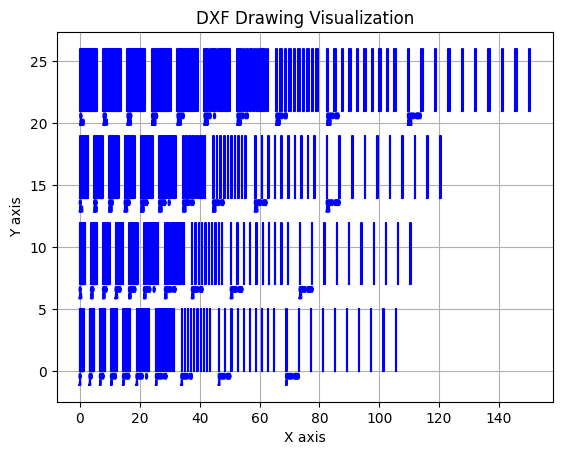

In [137]:
import ezdxf

import matplotlib.pyplot as plt

# Read the DXF file
doc = ezdxf.readfile('lt.dxf')
msp = doc.modelspace()

# Create a new figure
plt.figure()

# Plot each entity in the modelspace
for entity in msp:
    if entity.dxftype() == 'LWPOLYLINE':
        # Get the vertices of the polyline
        points = entity.get_points()
        x_coords = [p[0] for p in points]
        y_coords = [p[1] for p in points]
        
        # Plot the polyline
        plt.plot(x_coords, y_coords, 'b-')

# Set equal aspect ratio
plt.grid(True)

plt.title('DXF Drawing Visualization')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()